In [7]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import json
import csv
import time
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import sklearn.metrics as metrics
%matplotlib inline

In [8]:
################################################################################
# preprocess dataset, get Index-BussinessId pair for each city
################################################################################
business_df = pd.read_csv(open('./output/business.csv'))

cities = business_df.groupby('state').count()
top10cities = cities.business_id.sort_values().keys()[-10:]
print top10cities

#save top 10 cities to separate csv files with only index and businessid
question_dataframe_file = open('./output/city_cluster/ON_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
ON_df = business_df.business_id[business_df['state'] == 'ON']
ON_df.to_csv(question_dataframe_file)
question_dataframe_file.close()

question_dataframe_file = open('./output/city_cluster/IL_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
IL_df = business_df.business_id[business_df['state'] == 'IL']
IL_df.to_csv(question_dataframe_file)
question_dataframe_file.close()

question_dataframe_file = open('./output/city_cluster/BW_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
BW_df = business_df.business_id[business_df['state'] == 'BW']
BW_df.to_csv(question_dataframe_file)
question_dataframe_file.close()

question_dataframe_file = open('./output/city_cluster/WI_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
WI_df = business_df.business_id[business_df['state'] == 'WI']
WI_df.to_csv(question_dataframe_file)
question_dataframe_file.close()

question_dataframe_file = open('./output/city_cluster/EDH_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
EDH_df = business_df.business_id[business_df['state'] == 'EDH']
EDH_df.to_csv(question_dataframe_file)
question_dataframe_file.close()

question_dataframe_file = open('./output/city_cluster/PA_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
PA_df = business_df.business_id[business_df['state'] == 'PA']
PA_df.to_csv(question_dataframe_file)
question_dataframe_file.close()

question_dataframe_file = open('./output/city_cluster/QC_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
QC_df = business_df.business_id[business_df['state'] == 'QC']
QC_df.to_csv(question_dataframe_file)
question_dataframe_file.close()

question_dataframe_file = open('./output/city_cluster/NC_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
NC_df = business_df.business_id[business_df['state'] == 'NV']
NC_df.to_csv(question_dataframe_file)
question_dataframe_file.close()

question_dataframe_file = open('./output/city_cluster/NV_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
NV_df = business_df.business_id[business_df['state'] == 'NV']
NV_df.to_csv(question_dataframe_file)
question_dataframe_file.close()

question_dataframe_file = open('./output/city_cluster/AZ_business.csv', 'wb')
writer = csv.writer(question_dataframe_file, delimiter=',')
writer.writerow(['Index', 'BusinessId'])
AZ_df = business_df.business_id[business_df['state'] == 'AZ']
AZ_df.to_csv(question_dataframe_file)
question_dataframe_file.close()

Index([u'ON', u'IL', u'BW', u'WI', u'EDH', u'PA', u'QC', u'NC', u'NV', u'AZ'], dtype='object', name=u'state')


In [19]:
################################################################################
# get checkin data and euc_dist ready for cluster
################################################################################
dataframe_dict = {}
euc_dist_dict = {}
X_dict = {}
checkin_dataframe = pd.read_csv('./output/checkin_total.csv')
count = 0
for name in top10cities:
    city_df = pd.read_csv(open('./output/city_cluster/'+name+'_business.csv', 'r'))
    # filter business within current city from whole dataset
    dataframe_dict[name] = checkin_dataframe[checkin_dataframe['BusinessId'].isin(city_df['BusinessId'].tolist())]
    # calculate euc_dist and save it to dict
    euc_dist_dict[name] = metrics.euclidean_distances(
        dataframe_dict[name].drop(dataframe_dict[name].columns[0:2], axis = 1)
    )
    #drop BusinessId and total in checkin data for each city to test best cluster numbers
    X_dict[name] = dataframe_dict[name].drop(dataframe_dict[name].columns[0:2], axis = 1)

#drop BusinessId and total in checkin data for whole file to test best cluster numbers
X = checkin_dataframe.drop(checkin_dataframe.columns[0:2], axis = 1)

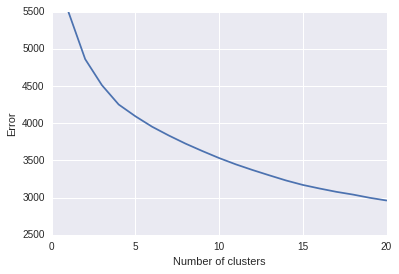

In [10]:
########################################
# test how many clusters is best => 10
########################################
def evaluate_clusters(X,max_clusters):
    error = np.zeros(max_clusters+1)
    error[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        error[k] = kmeans.inertia_

    plt.plot(range(1,len(error)),error[1:])
    plt.xlabel('Number of clusters')
    plt.ylabel('Error')

evaluate_clusters(X, 20)

In [11]:
########################################
# cluster SCRATCH:
#    for each city, cluster by check-in
########################################
for X in X_dict.keys():
    # for ON only
    if X == 'ON':
        kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
        kmeans.fit_predict(X_dict[X])
        centroids = kmeans.cluster_centers_
        labels = kmeans.labels_
        error = kmeans.inertia_
        print X + '==========================='
        print "The total error of the clustering is: ", error
        print '\nCluster labels'
        print labels
        print '\n Cluster Centroids'
        print centroids

ON===========================
The total error of the clustering is:  27.447470634

Cluster labels
[2 1 4 1 5 4 7 7 1 2 5 8 1 3 7 2 0 0 1 2 6 7 2 1 9 5 2 1 2 8 6 3 6 0 9 8 4
 7 1 2 3 0 9 5 0 1 8 4 9 5 0 0 8 7 4 1 7 1 9 5 0 2 0 2 9 9 5 2 9 1 2 4 1 3
 3 0 5 0 4 0 9 8 8 0 0 1 9 4 8 7 9 8 0 8 8 2 9 8 5 0 4 2 8 4 3 3 8 4 9 4 4
 2 8 4 3 1 2 3 5 5 5 9 5 2 0 8 1 8 2 1 3 7 4 8 0 3 7 3 7 0 4 1 4 8 3 9 6 9
 9 9 9 9 4 9 4 4 5 3 7 9 7 9 1 3 9 0 1 2 7 3 4 0 0 4 9 6 5 2 1 8 8 5 5 7 1
 0 5 4 1 5 8 1 7 9 7 7 7 9 7 3 2 1 3 9 2 4 1 4 8 1 5 2 4 8 0 1 8 0 5 4 5 9
 7 8 1 8 7 0 1 7 7 8 4 2 2 5 1 4 7 0 1 4 0 0 8 1 5 9 8 7 4 9 4 8 7 0 2 7 4
 2 8 0 7 7 0 4 9 3 9 1 0 1 5 1 8 8 7 4 7 7 8 4 0 4 9 4 8 3 7 4 4 3 5 1 7 1
 3 1 3 4 8 4 7 4 1 2 5 7 2 8 7 8 1 9 9 5 9 4 4 5 2 2 5 1 0 5 4 7 4 3 1 7 4
 2 7 1 6 9 2 4 4 4 4 4 4 6 4 0 1 3]

 Cluster Centroids
[[  3.33333333e-03   8.88888889e-03   2.94444444e-02   1.94444444e-02
    4.77777778e-02   8.05555556e-02   1.35277778e-01   1.29444444e-01
    1.34722222e-01   9.02777778

In [20]:
########################################
# plot specified business from checkin data frame
########################################
def plot_csv(target_business_list):
    target_df = pd.read_csv('./output/checkin_total.csv')
    
    #get dataframe
    df = target_df
    df = df.drop(df.columns[0:2], axis = 1)
    df_dict = {}
    df_dict['hours'] = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10',
          '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19','19-20', '20-21','21-22',
          '22-23', '23-0']
    if target_business_list != []:
        df = df[df.BusinessId in target_business_list]
        for i in range(len(df)):
            df_dict[df.BusinessId] = np.array(df.iloc[i].tolist())
    else:
        print 'list is empty'
        return
    plot_df = pd.DataFrame(df_dict)
    plot_df.plot(x = 'hours')
    
    #plot sum
    sum_dict = {}
    sum_plot = np.zeros(24)
    for i in df_dict.keys():
        if i != 'hours':
            sum_plot = np.add(sum_plot, df_dict[i])
    sum_dict['hours'] = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10',
          '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19','19-20', '20-21','21-22',
          '22-23', '23-0']
    sum_dict['avg'] = np.divide(sum_plot, len(df_dict))
    sum_df = pd.DataFrame(sum_dict)
    sum_df.plot(x = 'hours')

In [21]:
#read index-bussiness pair
ON_df = pd.read_csv(open('./output/city_cluster/ON_business.csv', 'r'))
#read checkin data
checkin_df = pd.read_csv('./output/checkin.csv')

#create a dict where key is cluster number and value is a list of BusinessId
temp_list = {}
curr_group = 0
for idx in labels.argsort():
    if labels[idx] == curr_group:
        if str(curr_group) not in temp_list.keys():
            temp_list[str(curr_group)] = [idx]
        else:
            temp_list[str(curr_group)].append(idx)
    else:
        curr_group += 1
        if str(curr_group) not in temp_list.keys():
            temp_list[str(curr_group)] = [idx]
        else:
            temp_list[str(curr_group)].append(idx)

# print ON_df
for i in range(0, len(temp_list)):
    plot_list = []
    for idx in temp_list[str(i)]:
        plot_list.append(ON_df.Index[idx])
    print plot_list
    plot_csv(plot_list)

[47215, 30431, 50773, 30439, 49336, 48506, 30448, 30449, 48466, 30497, 48286, 47234, 30570, 30458, 30460, 46990, 30490, 30473, 45965, 30475, 30477, 43210, 42972, 30481, 30482, 30583, 30569, 30442, 30414, 30563, 57469, 30415, 55352, 30522, 30532, 30537]


TypeError: plot_csv() got an unexpected keyword argument 'target_list'

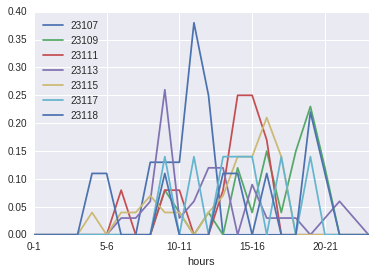

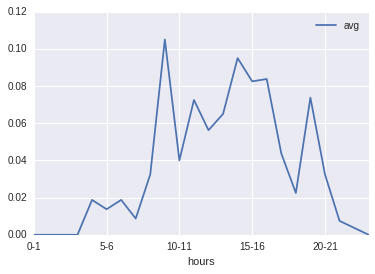

In [48]:
########################################
# test plot function
########################################

#read city business file
#target_df = pd.read_csv(csv_file_name)
target_df = pd.read_csv('./output/city_cluster/ON_business.csv')

#read checkin data
checkin_df = pd.read_csv('./output/checkin.csv')

#filter business in target city
target_df = checkin_dataframe[checkin_dataframe.BusinessId.isin(target_df.BusinessId.tolist())]

#plot specified business in dataframe
# plot_csv(target_df, head = 10, tail = 15)
plot_csv(target_df, target_list = [0, 2, 4, 6, 8, 10, 11])